In [1]:
import pandas as pd
import numpy as np

In [2]:
hydrogen_df = pd.read_csv("Datasets/hydrogen.csv")

hydrogen_df

,label,text
0,Irrelevant,agree with dr boyle s answer to can using hydr...
1,Relevant,intesasanpaolo snam strongstrongbuy mou with s...
2,Relevant,truckstop in lytton queensland will become the...
3,Relevant,will this toyota do for hydrogen what the priu...
4,Relevant,hydrogen fuel ferry declared a success in the ...
...,...,...
2495,Relevant,tesla sued for $ billion by hydrogen truck sta...
2496,Irrelevant,wow quantum microscope sees the hydrogen atom ...
2497,Irrelevant,myclobutanil is a triazole chemical used as a ...
2498,Relevant,let s talk about green hydrogen and why it act...


In [3]:
def create_binary_set(sentence,vocabulary):
    result = []
    words = set(sentence.split(" "))
    for word in vocabulary:
        if word in words:
            result.append(1)
        else:
            result.append(0)
    return result


In [4]:
def cosine_similarity(vector1,vector2):
    assert(len(vector1) == len(vector2)),\
    "The two vectors don't have the same length"

    a_dot_b = np.dot(vector1,vector2)
    a_mag = np.linalg.norm(vector1)
    b_mag = np.linalg.norm(vector2)
    return a_dot_b / (a_mag * b_mag)

In [5]:
V = set()

for sentence in hydrogen_df["text"]:
    V.update(sentence.split(" "))
vocabulary = sorted(list(V))

print("Vocabulary:", vocabulary)

binary_matrix = []
for sentence in hydrogen_df["text"]:
    binary_matrix.append(create_binary_set(sentence, vocabulary))

binary_df = pd.DataFrame(binary_matrix, columns=vocabulary)

df = pd.concat([hydrogen_df, binary_df], axis=1)

print("\nFinal DataFrame:")
print(df)

Vocabulary: ['$', '$$', '$aabb', '$acb', '$aee', '$agn', '$alkff', '$ang', '$aphlf', '$apple', '$avl', '$avr', '$bene', '$bldp', '$bpt', '$btc', '$cat', '$cdt', '$chpo', '$cia', '$clf', '$cob', '$cvx', '$egl', '$emh', '$eth', '$f', '$fcel', '$fwonk', '$gdg', '$ggii', '$gm', '$grn', '$grntf', '$hcch', '$hmbl', '$hpur', '$hydro', '$hygs', '$hysr', '$ilus', '$imgn', '$krbn', '$lin', '$ltnc', '$mt', '$nkla', '$npwz', '$ocn', '$org', '$pkx', '$plug', '$prrsf', '$pwwr', '$spd', '$trx', '$tsla', '$ual', '$v', '$ven', '$x', '$xfls', 'a', 'a$', 'aaa', 'aaron', 'aayog', 'aayushjs', 'ab', 'abate', 'abbas', 'abc', 'abcaustralia', 'abcclimatewatch', 'abcnews', 'abe', 'abeeolicaeolica', 'abengoa', 'aberdeen', 'aberdeencc', 'aberdeen’s', 'abfalecbaldwin', 'abg', 'able', 'ableg', 'abolish', 'about', 'above', 'absence', 'absent', 'absolutely', 'absurd', 'abt', 'abundance', 'abundant', 'abuse', 'academia', 'accelerate', 'accelerating', 'acceleration', 'accelerator', 'accept', 'accepted', 'access', 'acce

In [6]:
#remove text column
df = df.drop(columns="text")

In [ ]:
#Keep only numeric columns
X_bin = binary_df

#pick 3 document vectors
b1_full = X_bin.iloc[0].values.astype(float)
b2_full = X_bin.iloc[1].values.astype(float)
b3_full = X_bin.iloc[2].values.astype(float)

dims = [5, 10, 50, 100, 200, 500, 1000, X_bin.shape[1]]

for d in dims:
    b1 = b1_full[:d]
    b2 = b2_full[:d]
    b3 = b3_full[:d]

    euclidean_dist_d1d2 = np.linalg.norm(b1 - b2)
    euclidean_dist_d1d3 = np.linalg.norm(b1 - b3)

    print(f"Dimensions={d:4d} | d1-d2={euclidean_dist_d1d2:.3f} | d1-d3={euclidean_dist_d1d3:.3f}")

Dimensions=   5 | d1-d2=0.000 | d1-d3=0.000
Dimensions=  10 | d1-d2=0.000 | d1-d3=0.000
Dimensions=  50 | d1-d2=0.000 | d1-d3=0.000
Dimensions= 100 | d1-d2=0.000 | d1-d3=1.000
Dimensions= 200 | d1-d2=1.000 | d1-d3=1.000
Dimensions= 500 | d1-d2=2.000 | d1-d3=2.000
Dimensions=1000 | d1-d2=2.000 | d1-d3=2.828
Dimensions=9567 | d1-d2=5.745 | d1-d3=6.083


In [8]:
#pre-processing

from sklearn.preprocessing import LabelEncoder

# create encoder
le = LabelEncoder()

# learn the mapping
le.fit(df["label"])

# transform the original column into numbers
df["label"] = le.transform(df["label"])


df

,label,$,$$,$aabb,$acb,$aee,$agn,$alkff,$ang,$aphlf,...,🤖,🤝,🤣🤣🤣🤣🤣🤣🤣,🤦🏻‍♂️,🤨,🤭😜😂,🥴,🥺,🧐🤓🤔,🫧
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df

,label,$,$$,$aabb,$acb,$aee,$agn,$alkff,$ang,$aphlf,...,🤖,🤝,🤣🤣🤣🤣🤣🤣🤣,🤦🏻‍♂️,🤨,🤭😜😂,🥴,🥺,🧐🤓🤔,🫧
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# extract target attribute.
y = df["label"].values#.astype(int)
# remove target attribute from dataframe and store in X.
X = df.values.astype(int)

In [ ]:
from sklearn.preprocessing import StandardScaler

random_seed = 10

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# replace the old DataFrame for X, but retain the column names.

X = pd.DataFrame(X_scaled, index=df.index, columns=df.columns)

X

,label,$,$$,$aabb,$acb,$aee,$agn,$alkff,$ang,$aphlf,...,🤖,🤝,🤣🤣🤣🤣🤣🤣🤣,🤦🏻‍♂️,🤨,🤭😜😂,🥴,🥺,🧐🤓🤔,🫧
0,-1.099309,-0.154114,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,...,-0.020004,-0.028296,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004
1,0.909662,-0.154114,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,...,-0.020004,-0.028296,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004
2,0.909662,-0.154114,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,...,-0.020004,-0.028296,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004
3,0.909662,-0.154114,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,...,-0.020004,-0.028296,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004
4,0.909662,-0.154114,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,...,-0.020004,-0.028296,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.909662,6.488717,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,...,-0.020004,-0.028296,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004
2496,-1.099309,-0.154114,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,...,-0.020004,-0.028296,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004
2497,-1.099309,-0.154114,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,...,-0.020004,-0.028296,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004
2498,0.909662,-0.154114,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,...,-0.020004,-0.028296,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004,-0.020004


In [12]:
#fitting a PCA model.

from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X.values)

In [13]:
print(pca.explained_variance_ratio_)

[2.40905397e-03 2.19640864e-03 2.07629530e-03 ... 2.84039195e-34
 2.31028071e-34 1.04484322e-34]


In [ ]:
# explained variance ratio per component
explained_ratios = pca.explained_variance_ratio_

# compute cumulative variance manually
cumulative_variance = []
total = 0
for r in explained_ratios:
    total += r
    cumulative_variance.append(total)

print(cumulative_variance[:10])

[0.0024090539669493777, 0.0046054626109920775, 0.0066817579127678006, 0.008752270283794546, 0.01076483410238854, 0.012613112032397813, 0.014444979853273525, 0.0162731055874764, 0.018023317587986577, 0.019755746991222504]


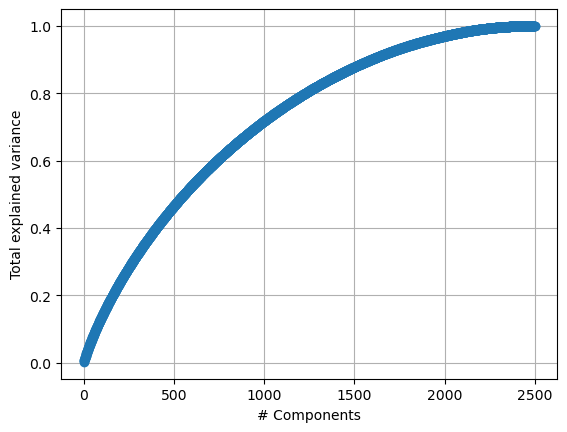

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker="o")
plt.xlabel("# Components")
plt.ylabel("Total explained variance")
plt.grid()
plt.show()

In [16]:
cumulative_variance_df = pd.DataFrame(
    cumulative_variance,
    index=range(1, len(cumulative_variance)+1),
    columns=["total_explained_variance"]
)
n_components_maximum = len(cumulative_variance_df)


print("Components needed for explaining maximum variance:", n_components_maximum)

Components needed for explaining maximum variance: 2500


In [17]:
n_components_maximum

2500

In [18]:
#find total explained variance of the top 5 components

explained_ratios = pca.explained_variance_ratio_
top5_variance = explained_ratios[:5].sum()
print("Explained variance of top 5 components:", top5_variance)

Explained variance of top 5 components: 0.01076483410238854


In [19]:
#rebuild PCA with just useful components

pca = PCA(n_components=n_components_maximum)
X_reduced = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)

Original shape: (2500, 9567)
Reduced shape: (2500, 2500)


In [20]:
X_reduced = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(n_components_maximum)])

In [21]:
X_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC2491,PC2492,PC2493,PC2494,PC2495,PC2496,PC2497,PC2498,PC2499,PC2500
0,-0.183749,-0.067611,-0.080896,-0.210397,-0.089757,-0.161978,-0.273740,-0.241146,-0.155854,-0.084402,...,2.742583e-17,2.988260e-20,-4.025552e-17,-5.990446e-22,1.438957e-20,4.022289e-20,-2.549487e-20,9.654676e-20,-2.310621e-19,1.751687e-23
1,-0.329677,-0.132894,-0.045296,-0.546936,-0.217688,-0.611292,-0.074072,-0.696348,1.477071,-0.650848,...,2.742583e-17,2.988260e-20,-4.025552e-17,-5.990446e-22,1.438957e-20,4.022289e-20,-2.549487e-20,9.654676e-20,-2.310621e-19,1.751687e-23
2,-0.295986,-0.209240,-0.041808,-0.373431,0.055096,-0.364435,-0.001997,-0.257292,0.089715,-0.514851,...,2.742583e-17,2.988260e-20,-4.025552e-17,-5.990446e-22,1.438957e-20,4.022289e-20,-2.549487e-20,9.654676e-20,-2.310621e-19,1.751687e-23
3,0.260189,-0.060557,-0.040914,-0.154887,-0.082125,-0.154609,-0.187086,0.071861,-0.209140,-0.082765,...,2.742583e-17,2.988260e-20,-4.025552e-17,-5.990446e-22,1.438957e-20,4.022289e-20,-2.549487e-20,9.654676e-20,-2.310621e-19,1.751687e-23
4,-0.170748,-0.123332,-0.098136,-0.305641,-0.158856,-0.326524,-0.046298,-0.186253,0.135417,-0.089284,...,2.742583e-17,2.988260e-20,-4.025552e-17,-5.990446e-22,1.438957e-20,4.022289e-20,-2.549487e-20,9.654676e-20,-2.310621e-19,1.751687e-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.194299,-0.047219,0.067900,-0.270404,-0.012608,-0.283035,-0.175027,-0.244054,-0.200962,-0.408725,...,2.742583e-17,2.988260e-20,-4.025552e-17,-5.990446e-22,1.438957e-20,4.022289e-20,-2.549487e-20,9.654676e-20,-2.310621e-19,1.751687e-23
2496,-0.173376,-0.031284,0.026475,-0.161962,-0.062677,-0.233759,-0.145710,-0.138664,-0.340214,0.544959,...,2.742583e-17,2.988260e-20,-4.025552e-17,-5.990446e-22,1.438957e-20,4.022289e-20,-2.549487e-20,9.654676e-20,-2.310621e-19,1.751687e-23
2497,-0.374424,-0.307655,-0.286740,-0.194561,-0.421763,-0.593574,-0.617098,-0.207702,-0.297593,-0.201341,...,2.742583e-17,2.988260e-20,-4.025552e-17,-5.990446e-22,1.438957e-20,4.022289e-20,-2.549487e-20,9.654676e-20,-2.310621e-19,1.751687e-23
2498,-0.163542,-0.161869,-1.098070,2.341961,-0.047144,-0.258533,-0.121140,-0.095164,-0.127530,-0.284539,...,2.742583e-17,2.988260e-20,-4.025552e-17,-5.990446e-22,1.438957e-20,4.022289e-20,-2.549487e-20,9.654676e-20,-2.310621e-19,1.751687e-23


In [22]:
loadings = pd.DataFrame(
    pca.components_.T, 
    index=X.columns, 
    columns=[f"PC{i+1}" for i in range(n_components_maximum)]
)

print(loadings.head())

            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
label -0.005270 -0.005555 -0.004726 -0.010932 -0.003460 -0.009078  0.010377   
$     -0.000843 -0.001175  0.000792 -0.001181  0.002440 -0.000225  0.000645   
$$    -0.000138 -0.000058  0.000015 -0.000266 -0.000114 -0.000288 -0.000117   
$aabb  0.006110 -0.000178 -0.000279  0.000052  0.000182  0.002339  0.001619   
$acb   0.207028  0.001500  0.000937  0.000949  0.000907  0.000967  0.000843   

            PC8       PC9      PC10  ...        PC2491        PC2492  \
label -0.008084  0.015297 -0.013129  ... -2.842159e-16 -5.360414e-17   
$     -0.001006 -0.000099 -0.003122  ...  2.166559e-03 -2.268210e-04   
$$    -0.000323 -0.000269 -0.000317  ... -9.955615e-03  5.885138e-03   
$aabb -0.001227 -0.000773 -0.001337  ... -2.546547e-02  1.508013e-04   
$acb   0.000159  0.001029  0.000751  ...  8.361079e-03 -7.384961e-04   

             PC2493        PC2494        PC2495        PC2496        PC2497  \
label  8.2399

##### Task 1.4 t-Distributed Stochastic Neighbour Embedding (t-SNE)

In [30]:
#KL divergence values when reducing the dataset to 1, 2, and 3 components

from sklearn.manifold import TSNE

random_state = 10

for n in [1, 2, 3]:
    print(f"\nRunning t-SNE with {n} component(s)...")
    tsne = TSNE(n_components=n,random_state=random_state)
    X_tsne = tsne.fit_transform(X_reduced.values)
    print(f"Shape with {n} component(s):", X_tsne.shape)
    print(f"KL divergence for {n} component(s):", tsne.kl_divergence_)


Running t-SNE with 1 component(s)...
Shape with 1 component(s): (2500, 1)
KL divergence for 1 component(s): 3.5992743968963623

Running t-SNE with 2 component(s)...
Shape with 2 component(s): (2500, 2)
KL divergence for 2 component(s): 3.48283052444458

Running t-SNE with 3 component(s)...
Shape with 3 component(s): (2500, 3)
KL divergence for 3 component(s): 6.5001630783081055


KL Divergence for perplexity of 5: 4.89390230178833
KL Divergence for perplexity of 10: 4.579953670501709
KL Divergence for perplexity of 15: 4.104965686798096
KL Divergence for perplexity of 20: 3.848212480545044
KL Divergence for perplexity of 25: 3.648017644882202
KL Divergence for perplexity of 30: 3.482532501220703
KL Divergence for perplexity of 35: 3.342588186264038
KL Divergence for perplexity of 40: 3.2203612327575684
KL Divergence for perplexity of 45: 3.112197160720825
KL Divergence for perplexity of 50: 3.0149381160736084


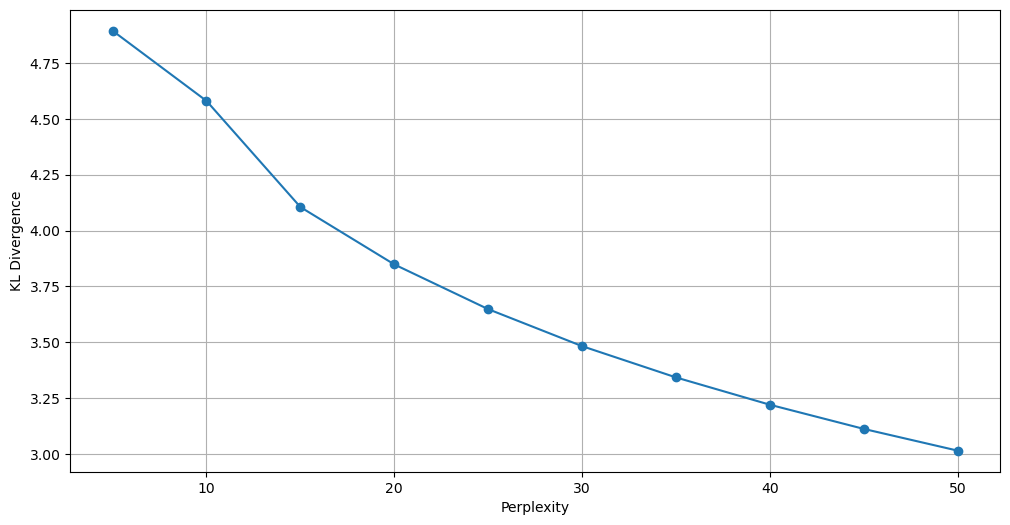

In [ ]:
#select perplexity value

# evaluate KL Divergence across different perplexity values for t-SNE
tsne_perplexity_num = np.arange(5, 51, 5)
tsne_perplexity_divergence = []

for perplexity in tsne_perplexity_num:
    # fit a TSNE model with the specified perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
    tsne.fit(X.values)
    
    # record KL divergence
    tsne_perplexity_divergence.append(tsne.kl_divergence_)
    
    print(f"KL Divergence for perplexity of {perplexity}: {tsne.kl_divergence_}")
 
 # add grid lines to improve visibility
plt.figure(1, figsize=(12, 6))
plt.grid(True)

# plot each of the data points using a circular marker
plt.plot(tsne_perplexity_num, tsne_perplexity_divergence, marker='o')

# set axis labels
plt.xlabel("Perplexity")
plt.ylabel("KL Divergence")

# display the plot
plt.show()


In [24]:
print("KL divergence for 2 components:", tsne.kl_divergence_)


KL divergence for 2 components: 3.015061378479004


In [ ]:
# fit t-SNE with 2 components and a perplexity of 50
tsne = TSNE(n_components=2, perplexity=50, random_state=random_state)
X_tsne = tsne.fit_transform(X.values)

print("KL Divergence with 2 components and perplexity of 50:", tsne.kl_divergence_)


KL Divergence with 2 components and perplexity of 50: 3.0149381160736084


In [26]:
for n in [1, 2, 3]:
    print(f"\nRunning t-SNE with {n} component(s)...")
    tsne = TSNE(n_components=n, random_state=random_state) #TSNE(n_components=2, perplexity=40, random_state=10)
    X_tsne = tsne.fit_transform(X_reduced.values)
    print(f"KL divergence for {n} components:", X_tsne.shape)


Running t-SNE with 1 component(s)...


NameError: name 'random_state' is not defined

(2500, 3)
Shape: (2500, 3)


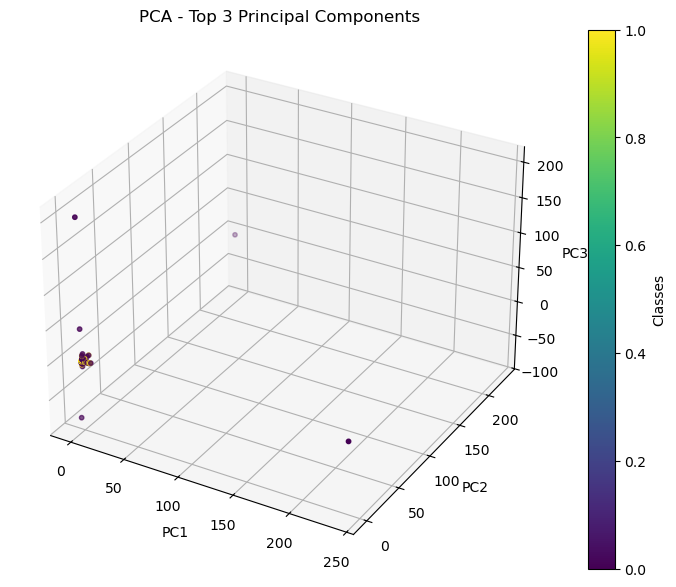

In [ ]:
#top 3 components from PCA

X_pca_top3 = X_pca[:, :3]
print(X_pca_top3.shape)

import matplotlib.pyplot as plt

# select the top 3 PCA components
X_pca_top3 = X_pca[:, :3]
print("Shape:", X_pca_top3.shape)

# create a figure and specify a 3D subplot
fig = plt.figure(figsize=(10, 7))
ax = plt.subplot(projection='3d')

# 3D scatter plot
sc = ax.scatter(
    X_pca_top3[:, 0],  
    X_pca_top3[:, 1],  
    X_pca_top3[:, 2],  
    c=y,               
    cmap='viridis',
    s=10
)

# label axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA - Top 3 Principal Components")

# add colorbar and grid
plt.colorbar(sc, label="Classes")
plt.grid(True)
plt.show()


In [ ]:
#visualise top 3 components from  t-SNE

# fit t-SNE with 3 components
tsne = TSNE(n_components=3, perplexity=50, random_state=10)
X_tsne_3d = tsne.fit_transform(X_reduced.values)


print("KL Divergence with 3 components and perplexity of 50:", tsne.kl_divergence_)

KL Divergence with 3 components and perplexity of 50: 5.02781867980957


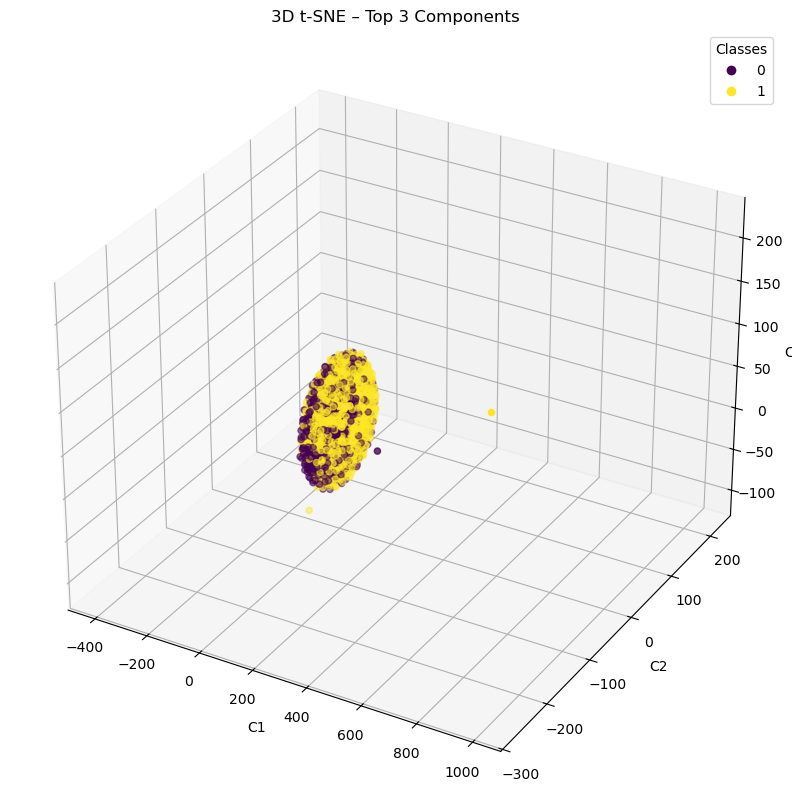

In [ ]:
#visualise top 3 components from  t-SNE

import matplotlib.pyplot as plt

# create a figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")

# 3D scatter plot
scatter = ax.scatter(
    X_tsne_3d[:, 0],
    X_tsne_3d[:, 1],
    X_tsne_3d[:, 2],
    c=y,
    cmap='viridis',
    s=20
)

# add color legend
plt.legend(*scatter.legend_elements(), title="Classes")

# label axes
ax.set(
    xlabel="C1",
    ylabel="C2",
    zlabel="C3"
)

# add title and grid
ax.set_title("3D t-SNE – Top 3 Components")
plt.grid(True)
plt.show()


KL Divergence (2D): 3.015061378479004


C:\Users\23179\AppData\Local\Temp\ipykernel_22588\3038125553.py:18: UserWarning: Adding colorbar to a different Figure <Figure size 1000x700 with 2 Axes> than <Figure size 1400x600 with 1 Axes> which fig.colorbar is called on.
  fig.colorbar(sc, ax=ax, label="Classes", shrink=0.6)


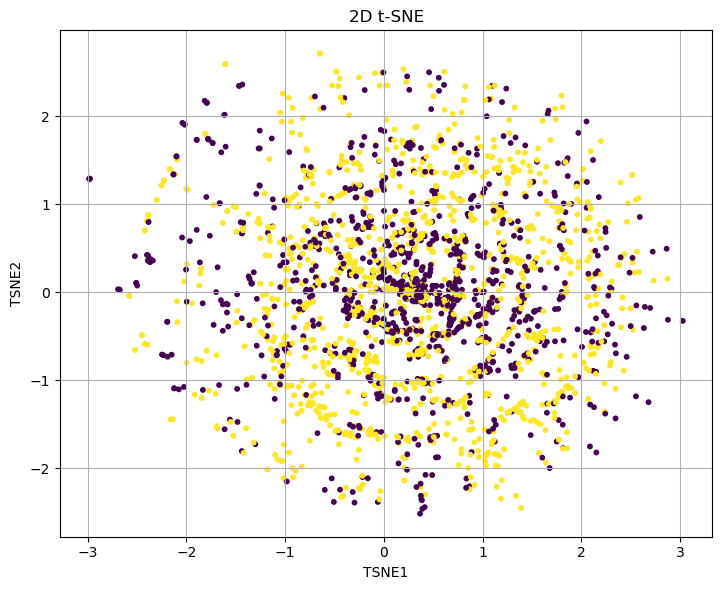

In [43]:
#visualise 2D for reference

tsne_2d = TSNE(n_components=2, perplexity=50, random_state=10)
X_tsne_2d = tsne_2d.fit_transform(X_reduced.values)

print("KL Divergence (2D):", tsne_2d.kl_divergence_)

fig = plt.figure(figsize=(14, 6))

# 2D subplot
plt.subplot(1, 2, 1)
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y, cmap='viridis', s=10)
plt.title("2D t-SNE")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.grid(True)

fig.colorbar(sc, ax=ax, label="Classes", shrink=0.6)

plt.tight_layout()
plt.show()